In [18]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}

titles = works.keys()

In [19]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [3]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [4]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [5]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [20]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [7]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [8]:
def getAverageSentenceLength(sents):
    results = 0
    for s in sents:        
        results += len(s)
    return results/len(sents)


In [21]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

result = getPronounDistribution(works['THE TRAGEDY OF ANTONY AND CLEOPATRA ACT_3|S'][1])
printFreqDist(result)


0 94
1 37
2 28
3 17
4 10
5 11
6 8
7 3
8 3
9 1
12 1


In [22]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result

result = getConjunctionDistribution(works['THE TRAGEDY OF ANTONY AND CLEOPATRA ACT_3|S'][1])
printFreqDist(result)


0 112
1 40
2 22
3 9
4 12
5 7
6 3
7 3
8 2
9 1
10 1
11 1


In [18]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': []}

for act, content in works.items():
    words = content[0]
    sentences = content[1]
    # Normalize by number of sentences
    normalizer = len(sentences)
    featureTable['act'].append(act)
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(sentences))
    featureTable['numberOfSentences'].append(len(sentences))

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,numberOfSentences,numberUniqueWords
act,,,,,
A MIDSUMMER NIGHT'S DREAM ACT V.,0.356287,1.658683,60.128743,334,2.514970
THE TWO GENTLEMEN OF VERONA ACT II.,0.234104,0.916185,42.972543,692,1.473988
THE COMEDY OF ERRORS ACT1593,8.200000,5.400000,337.200000,5,15.800000
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT I.",0.326531,1.386054,56.971088,588,2.178571
THE MERCHANT OF VENICE ACT III,0.404348,1.478261,67.510870,460,2.443478


In [24]:
# Filter out wierd acts, e.g. the beginning of a play

df = df[df['averageSentenceLength'] < 168]

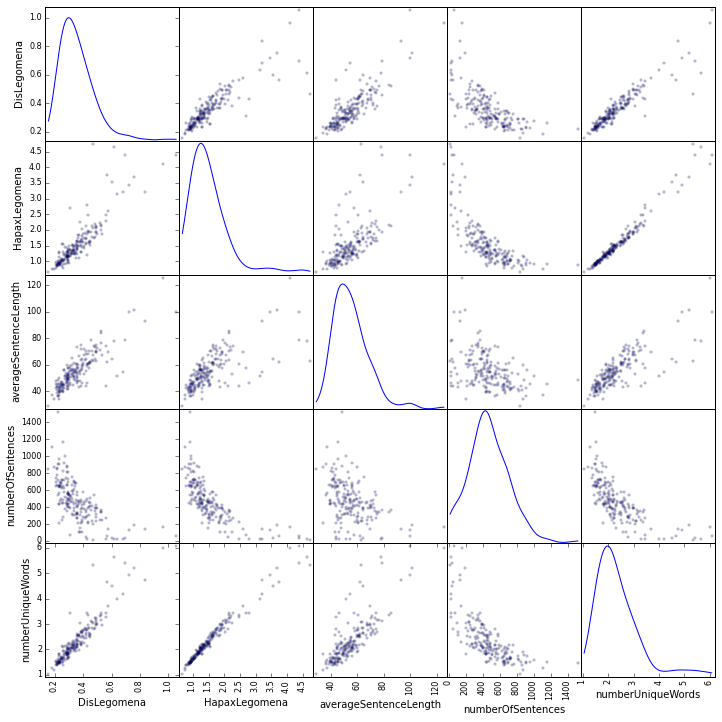

In [25]:
pd.scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

In [23]:
df.to_excel('feature.xlsx')